In [248]:
import numpy as np # linear algebra
import pandas as pd # Data processing, CSV file I/O (e.g. pd.read_csv)
# Plots
import seaborn as sns # importing seaborn for statistical plots
import matplotlib.pyplot as plt # matplotlib.pyplot plots data
# Train test split
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
# Model
from sklearn.neighbors import KNeighborsClassifier # To model the KNN classifier
# Metrics
from sklearn import metrics # sklearn metrics module implements utility functions to measure classification performance
from sklearn.metrics import confusion_matrix # Computes confusion matrix to evaluate the accuracy of a classification
from sklearn import preprocessing # Provides several common utility functions: standardization of the data set
from sklearn.preprocessing import StandardScaler # Standardizes features by removing the mean andscaling to unit variance
from sklearn.metrics import accuracy_score

In [249]:
df = pd.read_csv('diabetes.csv')

# Data Preprocessing

In [250]:
df.shape

(768, 9)

In [251]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [253]:
df.isnull().values.any()

False

In [254]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [255]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# EDA

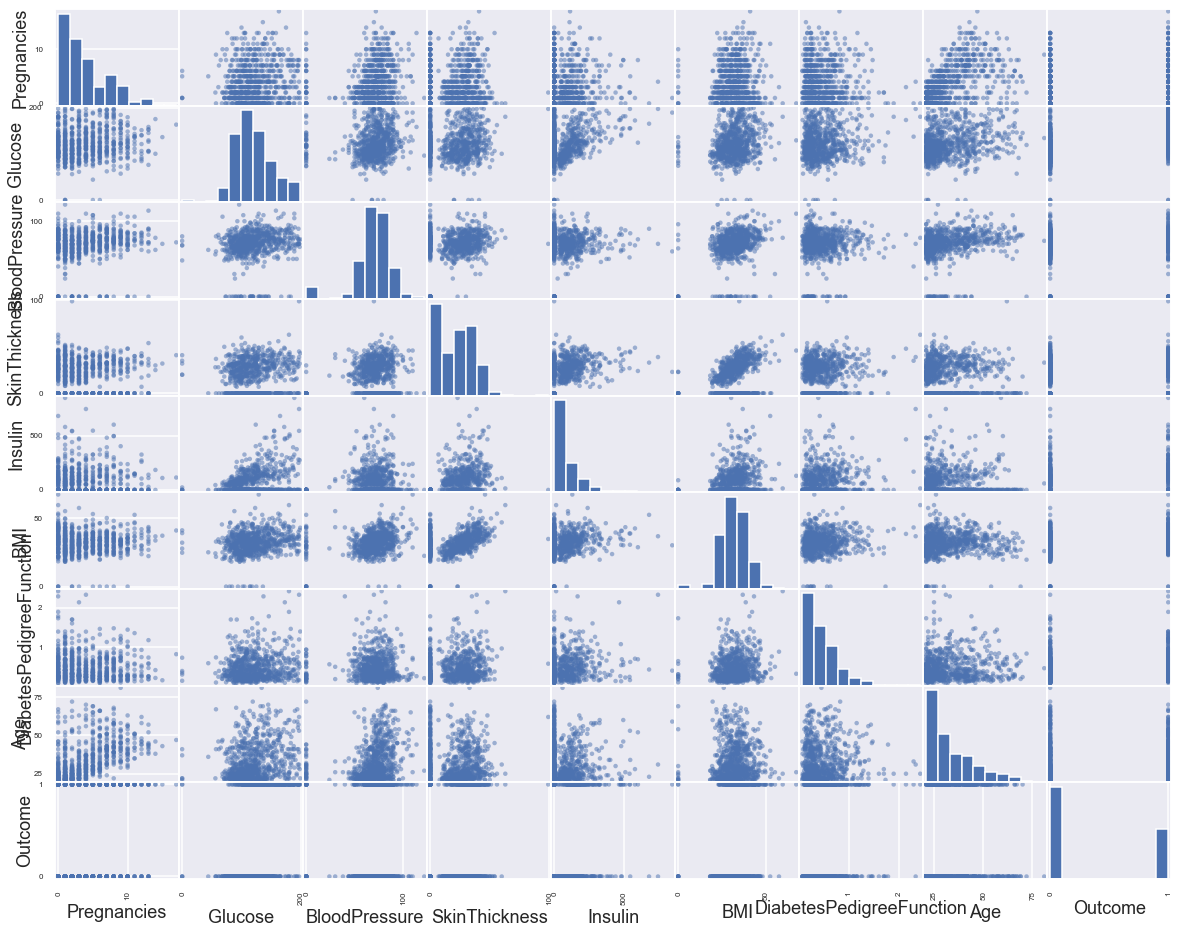

In [256]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(20,16))
plt.show()

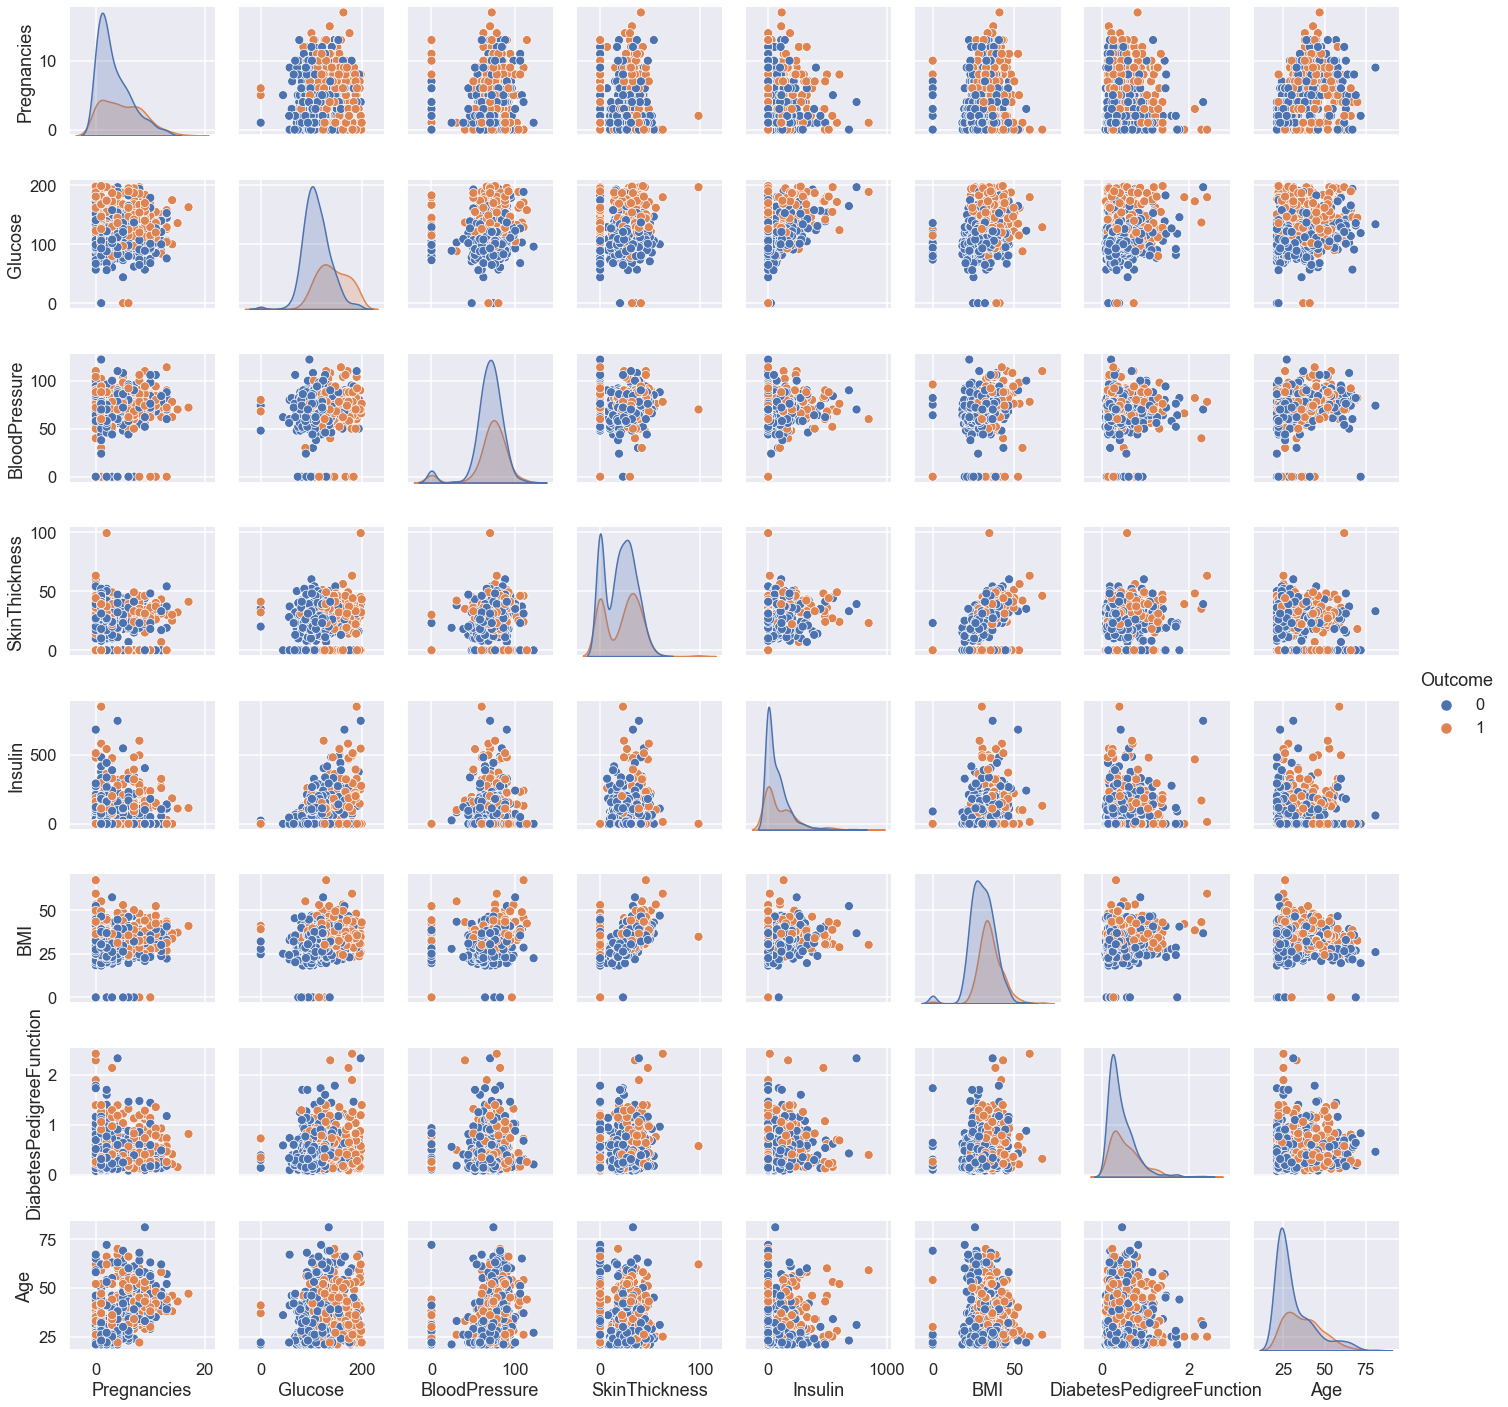

In [257]:
sns.pairplot(df, hue='Outcome')
plt.show()

<AxesSubplot:xlabel='Pregnancies', ylabel='Count'>

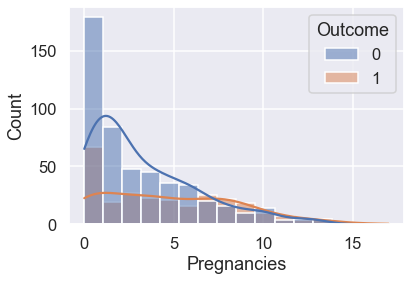

In [259]:
sns.histplot(x="Pregnancies", hue="Outcome", data=df, kde=True)

<AxesSubplot:xlabel='BMI', ylabel='Count'>

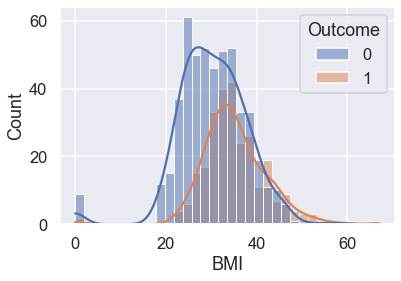

In [260]:
sns.histplot(x="BMI", hue="Outcome", data=df, kde=True)

Text(0, 0.5, 'countings')

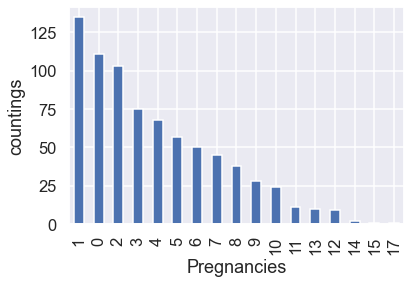

In [261]:
df['Pregnancies'].value_counts().plot.bar()
plt.xlabel('Pregnancies')
plt.ylabel('countings')

Text(0, 0.5, 'countings')

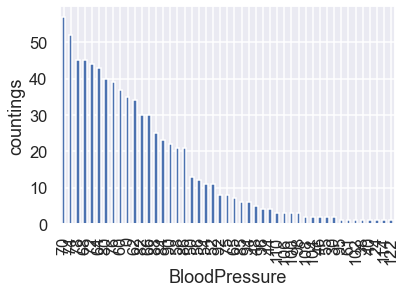

In [262]:
df['BloodPressure'].value_counts().plot.bar()
plt.xlabel('BloodPressure')
plt.ylabel('countings')

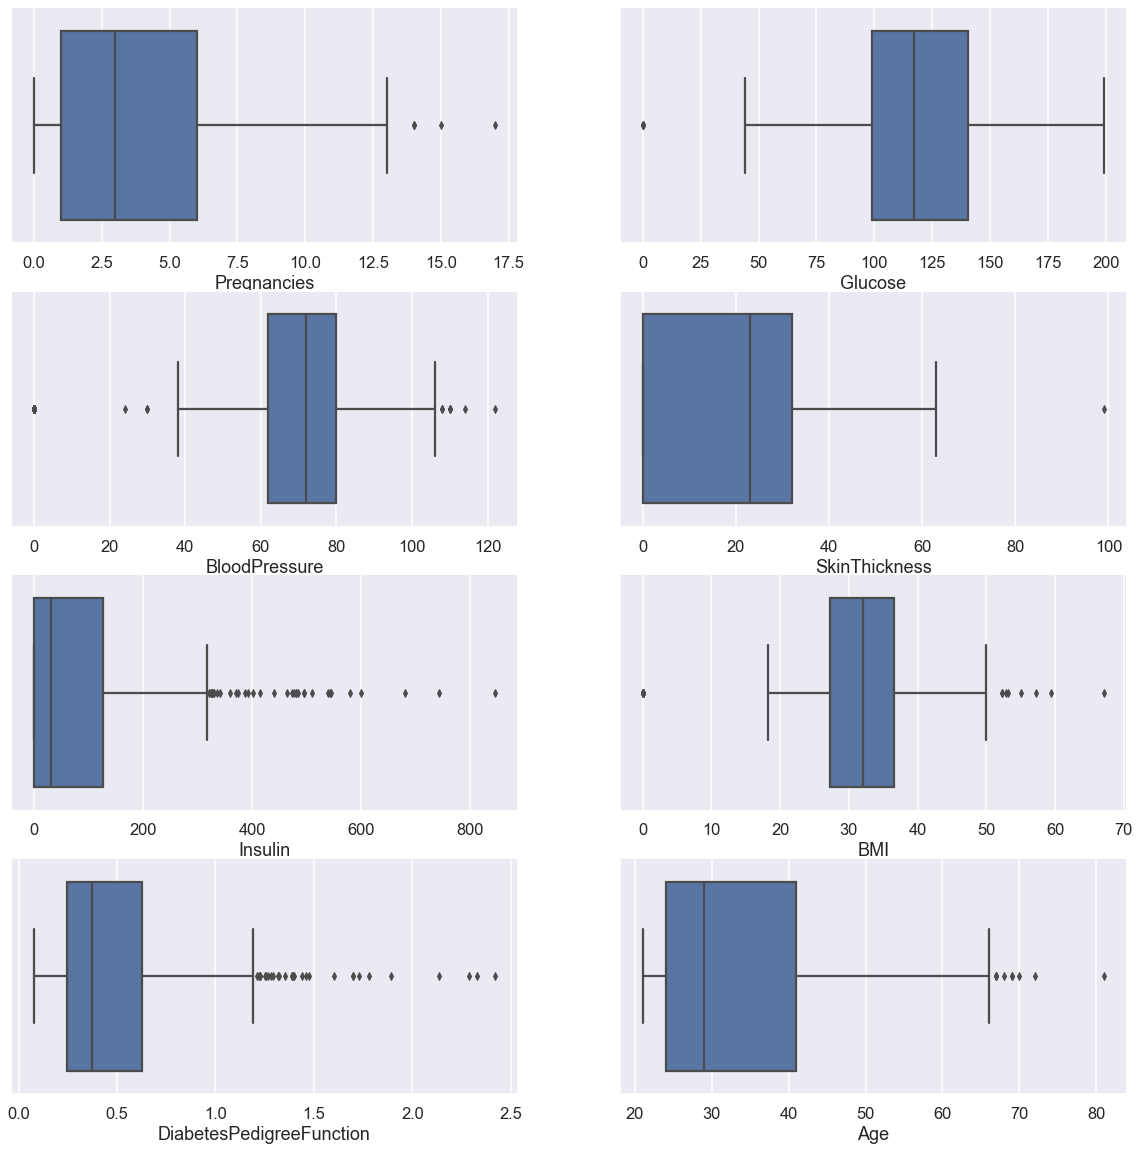

In [263]:
fig, axs = plt.subplots(4, 2, figsize=(20,20))
axs = axs.flatten()
for i in range(len(df.columns)-1):
    sns.boxplot(data=df, x=df.columns[i], ax=axs[i])

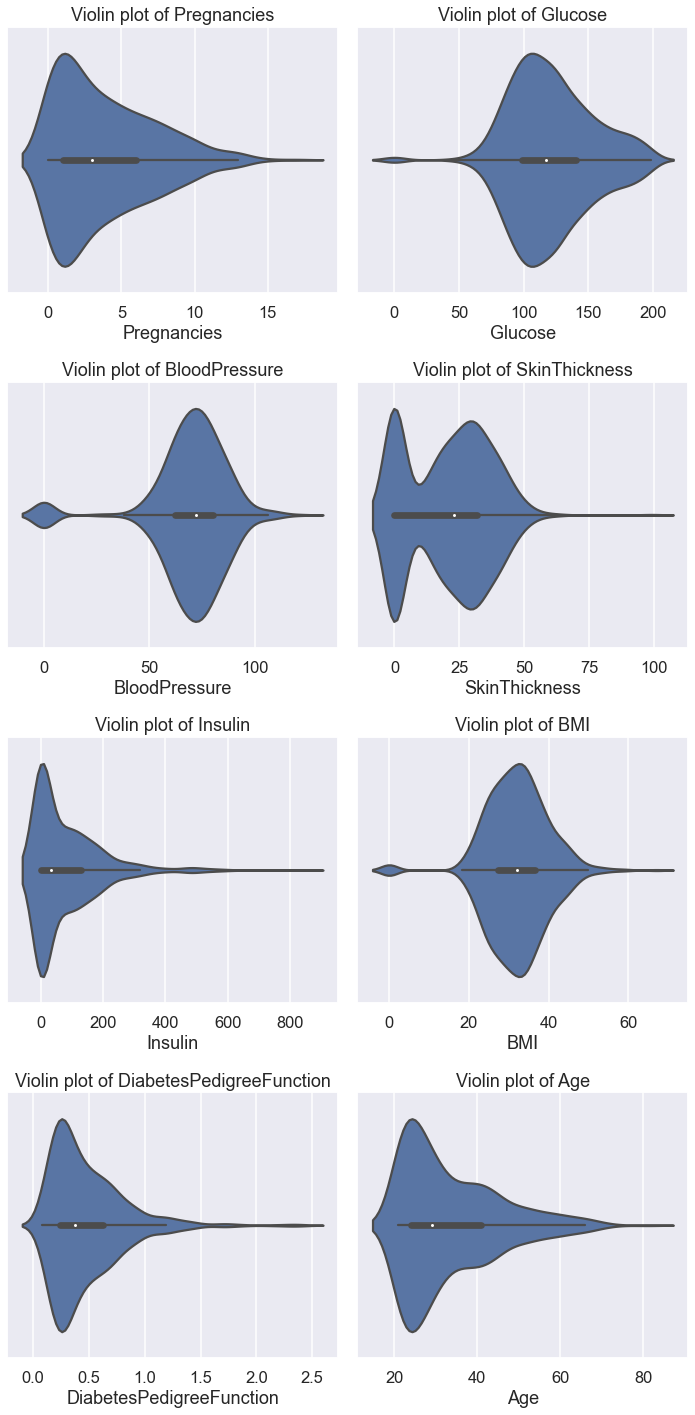

In [264]:
num_columns = len(df.columns.drop('Outcome'))
num_rows = (num_columns + 1) // 2
plt.figure(figsize=(10, 5*num_rows))
for i, column in enumerate(df.columns.drop('Outcome')):
    plt.subplot(num_rows, 2, i+1)
    sns.violinplot(x=df[column])
    plt.title(f'Violin plot of {column}')

plt.tight_layout()
plt.show()

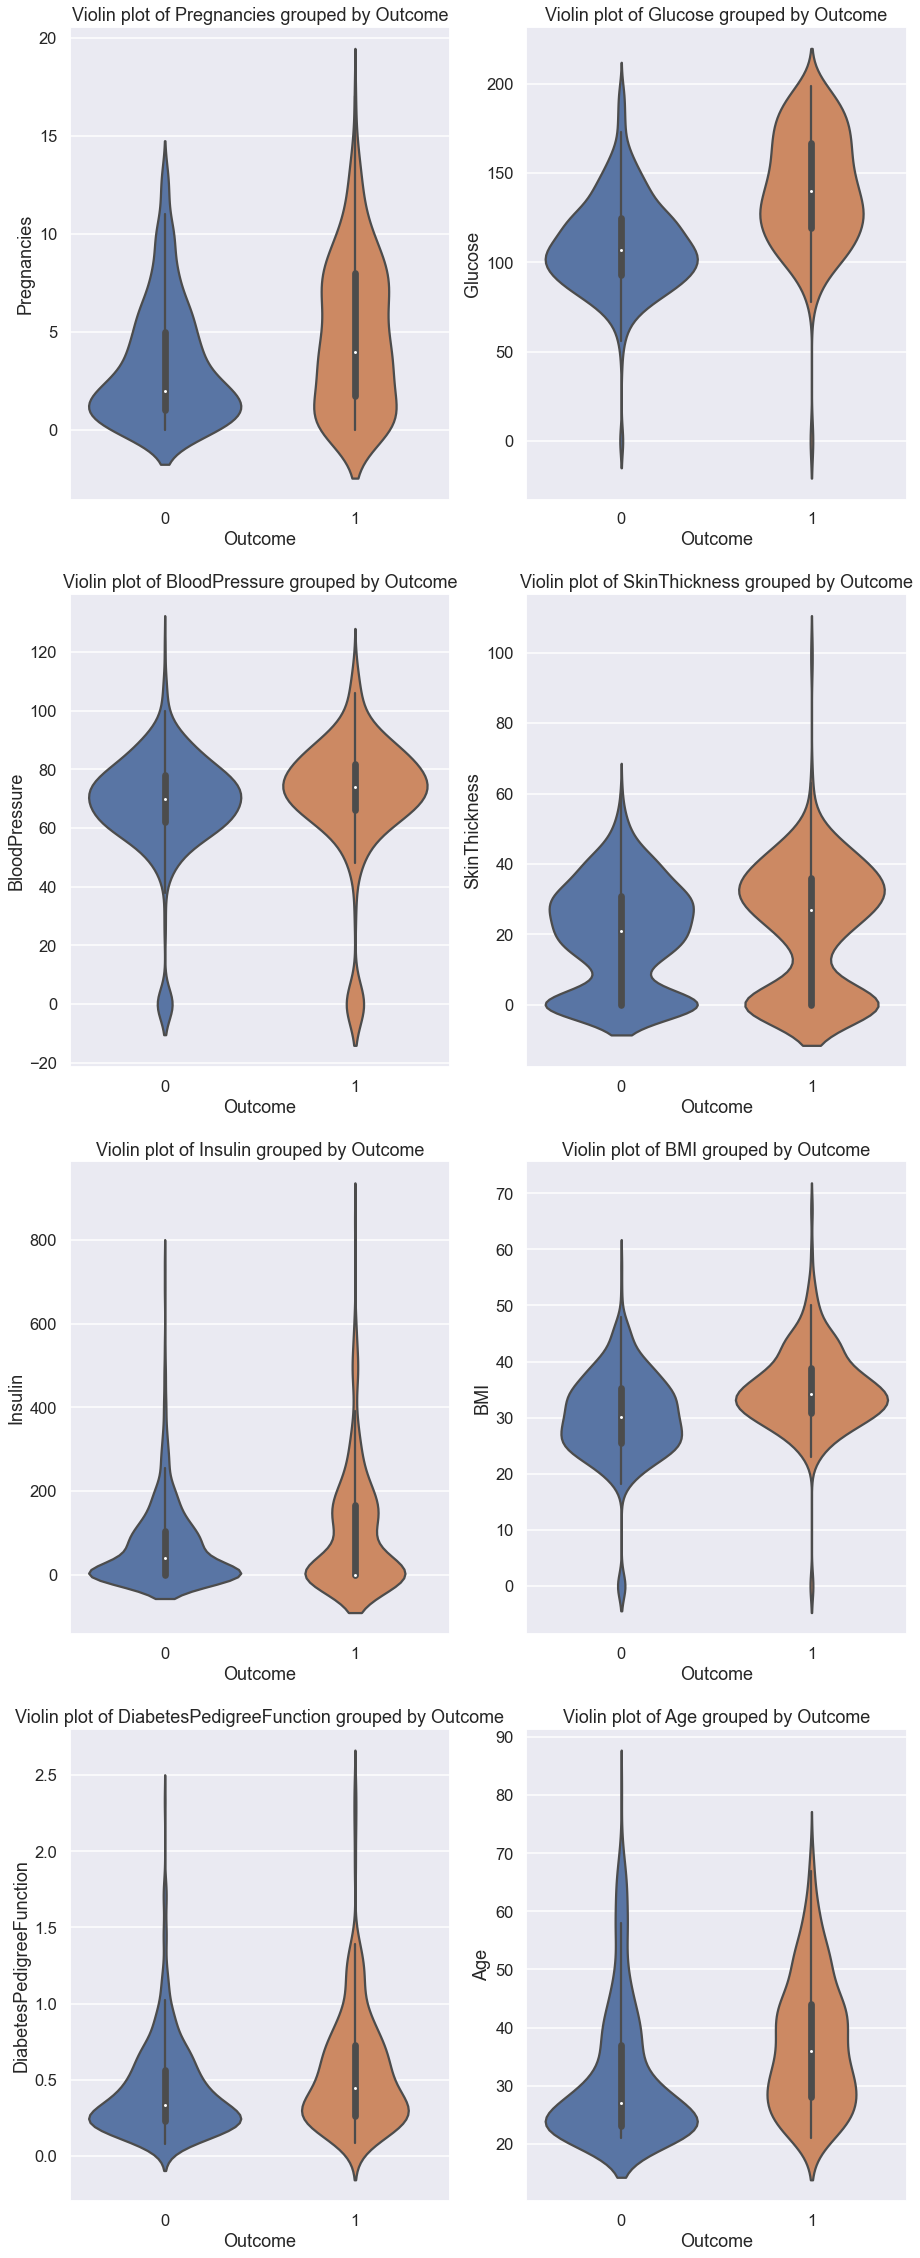

In [265]:
plt.figure(figsize=(15, 10*num_rows))
for i, column in enumerate(df.columns.drop('Outcome')):
    plt.subplot(num_rows, 2, i+1)
    sns.violinplot(data=df, x='Outcome', y=column)
    plt.title(f'Violin plot of {column} grouped by Outcome')

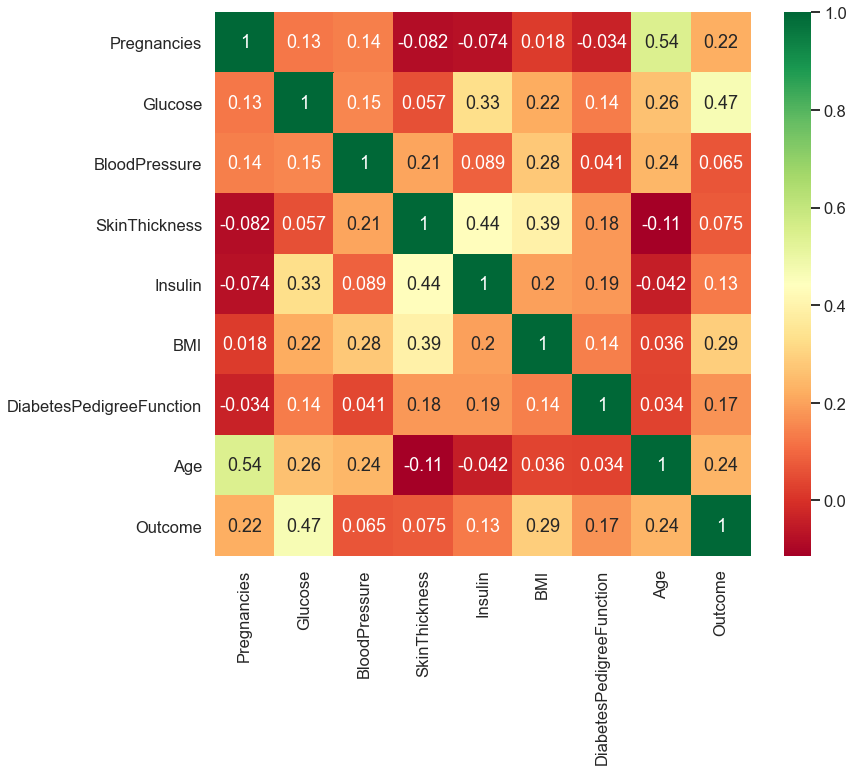

In [266]:
plt.figure(figsize=(12,10))
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

# Splitting the dataset

In [267]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [268]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [269]:
# Checking split of data
print('X training data size: {}'.format(X_train.shape))
print('y training data size: {}'.format(y_train.shape))
print('X testing data size: {}'.format(X_test.shape))
print('y testing data size: {}'.format(y_test.shape))
print("{0:0.2f}% of data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% of data is in test set".format((len(X_test)/len(df.index)) * 100))

X training data size: (537, 8)
y training data size: (537,)
X testing data size: (231, 8)
y testing data size: (231,)
69.92% of data is in training set
30.08% of data is in test set


# K-Nearest Neighbour classifier

In [270]:
# Creating number list from range 1 to 20 of K for KNN with X_train, X_test, y_train, y_test
numberList = list(range(1,20))
neighbors = list(filter(lambda x: x % 2 != 0 , numberList)) #subsetting just the odd ones

In [271]:
# Declaring an empty list that will hold the accuracy scores
ac_scores = []

In [272]:
# performing accuracy metrics for value from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    #predict the response
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_test)
    #evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    #insert scores to the list
    ac_scores.append(scores)

In [273]:
# changing to misclassification error
MSE = [1 - x for x in ac_scores]

In [274]:
# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]

In [275]:
print('Odd Neighbors : \n', neighbors)
print('\nAccuracy Score : \n', ac_scores)
print('\nMisclassification error :\n', MSE)
print("\nThe optimal number of neighbor is k=",optimal_k)

Odd Neighbors : 
 [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

Accuracy Score : 
 [0.7575757575757576, 0.7359307359307359, 0.7705627705627706, 0.7619047619047619, 0.7489177489177489, 0.7662337662337663, 0.7748917748917749, 0.7878787878787878, 0.7878787878787878, 0.7705627705627706]

Misclassification error :
 [0.24242424242424243, 0.2640692640692641, 0.22943722943722944, 0.23809523809523814, 0.25108225108225113, 0.23376623376623373, 0.22510822510822515, 0.21212121212121215, 0.21212121212121215, 0.22943722943722944]

The optimal number of neighbor is k= 15


In [276]:
acc_tr=knn.score(X_train,y_train)
print(" Accuracy on train dataset is: ",acc_tr)

 Accuracy on train dataset is:  0.7653631284916201


In [277]:
acc_te=knn.score(X_test,y_test)
print(" Accuracy on test dataset is: ",acc_te)

 Accuracy on test dataset is:  0.7705627705627706


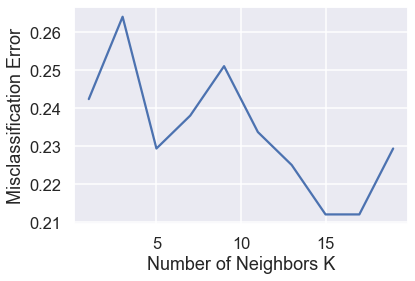

In [278]:
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

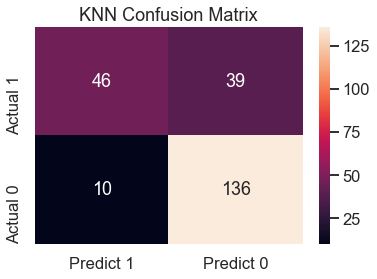

In [279]:
# Confusion matrix
cm=metrics.confusion_matrix(y_test, knn_pred, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
columns = [i for i in ["Predict 1","Predict 0"]])
plt.title('KNN Confusion Matrix')
sns.heatmap(df_cm, annot=True, fmt='g');

In [280]:
# Accuracy
TP = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TN = cm[1,1]
# Print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy: {0:0.4f}'.format(classification_accuracy))

Classification accuracy: 0.7879


# Logistic Regression

In [281]:
import seaborn as sns # importing seaborn for statistical plots
import matplotlib.pyplot as plt # matplotlib.pyplot plots data
# Train test split
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn import model_selection # Sklearn package to evaluate a score by cross-validation
# Model
from sklearn.linear_model import LogisticRegression # To model the Logistic regression classifier
# Cross Validation
from sklearn.model_selection import KFold # Splits dataset into k consecutive folds
from sklearn.model_selection import cross_val_score # Evaluates a score by cross-validation
# Metrics
from sklearn import metrics # sklearn metrics module implements utility functions to measure classification performance
from sklearn.metrics import confusion_matrix # Computes confusion matrix to evaluate the accuracy of a classification
from sklearn import preprocessing # Provides several common utility functions: standardization of the data set

In [282]:
# Model building
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

In [283]:
acc_train=log_model.score(X_train,y_train)
print("acccuracy on training dataset is : ",acc_train)

acccuracy on training dataset is :  0.7728119180633147


In [284]:
acc_test=log_model.score(X_test,y_test)
print("acccuracy on test dataset is : ",acc_test)

acccuracy on test dataset is :  0.7835497835497836


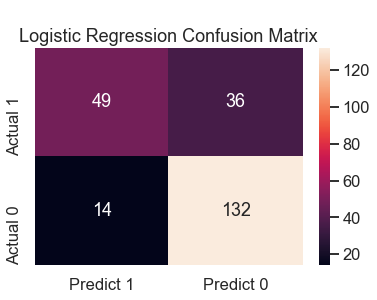

In [285]:
# Confusion matrix
cm=metrics.confusion_matrix(y_test, log_pred, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
columns = [i for i in ["Predict 1","Predict 0"]])
plt.title('\nLogistic Regression Confusion Matrix')
sns.heatmap(df_cm, annot=True, fmt='g');

In [286]:
# Accuracy
TP = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TN = cm[1,1]
# Print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('\nClassification accuracy: {0:0.4f}'.format(classification_accuracy))


Classification accuracy: 0.7835


In [287]:
from sklearn.tree import DecisionTreeClassifier

In [288]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature]) # Replace strings with an integer
        df.head(10)

In [289]:
# Build the model
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [290]:
# Score
print('Training score:', dTree.score(X_train, y_train))

Training score: 1.0


In [291]:
# Score
print('Test score:', dTree.score(X_test, y_test))

Test score: 0.6883116883116883


In [292]:
# Visualizing the tree
from sklearn.tree import export_graphviz
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = export_graphviz(dTree, out_file=Credit_Tree_File, feature_names = list(X_train), class_names
= list(train_char_label))
Credit_Tree_File.close()

In [293]:
from os import system
from IPython.display import Image

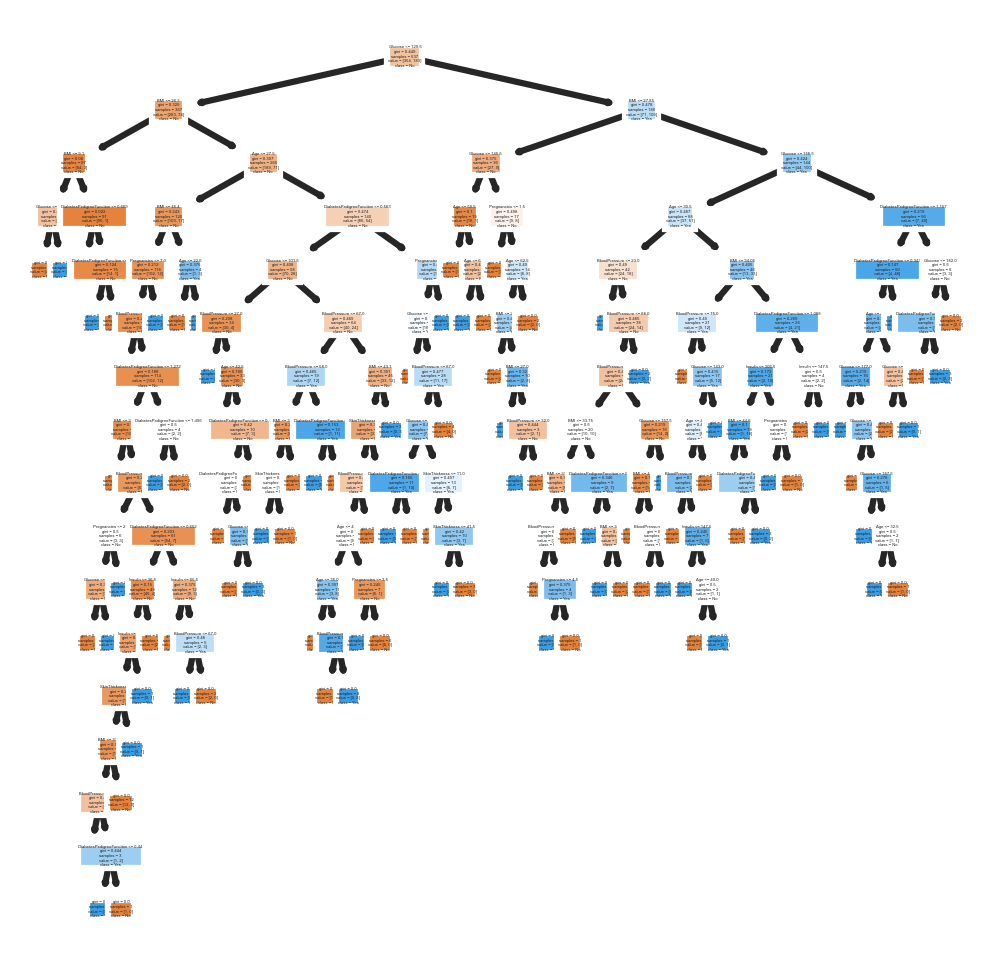

In [294]:
from sklearn.tree import plot_tree
fn = list(X_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTree, feature_names = fn, class_names=cn, filled = True)
fig.savefig('tree.png')

In [295]:
# Feature importance
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns))

                               Imp
Pregnancies               0.050616
Glucose                   0.286047
BloodPressure             0.168084
SkinThickness             0.048001
Insulin                   0.032465
BMI                       0.175812
DiabetesPedigreeFunction  0.118873
Age                       0.120103


# Random Forest Classifier

In [296]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [297]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score of training dataset=", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score of training dataset= 1.0


In [298]:
predictions = rfc.predict(X_test)
print("Accuracy_Score of test dataset=", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score of test dataset= 0.7878787878787878


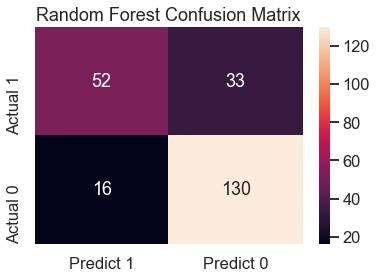

In [299]:
# Confusion matrix
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
columns = [i for i in ["Predict 1","Predict 0"]])
plt.title('Random Forest Confusion Matrix')
sns.heatmap(df_cm, annot=True, fmt='g');

# K-fold cross validation

In [300]:
# K-fold Cross Validation
num_folds =10 # Split dataset into 10 consecutive folds
kfold = KFold(n_splits=num_folds)

In [301]:
test_score = []
train_score = []

In [302]:
for train_index, test_index in kfold.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model on the training data
    knn.fit(x_train, y_train)
    
    # Make predictions on the train and test data
    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)
    
    # Calculate the accuracy score for this fold
    accuracy_test = metrics.accuracy_score(y_pred_test,y_test)
    accuracy_train = metrics.accuracy_score(y_pred_train,y_train)
    
    # Store the accuracy score
    test_score.append(accuracy_test)
    train_score.append(accuracy_train)

In [303]:
print("\nTraining Accuracy Scores for Each Fold:")
for fold, score in enumerate(train_score):
    print(f"Fold {fold+1}: {score}")
    print("\nTesting Accuracy Scores for Each Fold:")


Training Accuracy Scores for Each Fold:
Fold 1: 0.7945007235890015

Testing Accuracy Scores for Each Fold:
Fold 2: 0.7785817655571635

Testing Accuracy Scores for Each Fold:
Fold 3: 0.7872648335745297

Testing Accuracy Scores for Each Fold:
Fold 4: 0.788712011577424

Testing Accuracy Scores for Each Fold:
Fold 5: 0.7814761215629522

Testing Accuracy Scores for Each Fold:
Fold 6: 0.7655571635311144

Testing Accuracy Scores for Each Fold:
Fold 7: 0.7727930535455861

Testing Accuracy Scores for Each Fold:
Fold 8: 0.7829232995658466

Testing Accuracy Scores for Each Fold:
Fold 9: 0.7875722543352601

Testing Accuracy Scores for Each Fold:
Fold 10: 0.7875722543352601

Testing Accuracy Scores for Each Fold:


In [304]:
for fold, score in enumerate(test_score):
    print(f"Fold {fold+1}: {score}")

Fold 1: 0.6883116883116883
Fold 2: 0.7792207792207793
Fold 3: 0.6623376623376623
Fold 4: 0.6363636363636364
Fold 5: 0.7662337662337663
Fold 6: 0.7662337662337663
Fold 7: 0.8311688311688312
Fold 8: 0.8571428571428571
Fold 9: 0.7763157894736842
Fold 10: 0.75


In [305]:
average_accuracy_train = sum(train_score) / len(train_score)
print("\nAverage Accuracy Training Score:", average_accuracy_train)


Average Accuracy Training Score: 0.7826953481174138


In [306]:
average_accuracy_test = sum(test_score) / len(test_score)
print("\nAverage Accuracy Testing Score:", average_accuracy_test)


Average Accuracy Testing Score: 0.7513328776486671


# Naive Bayes

In [307]:
%matplotlib inline 
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set("talk","darkgrid",font_scale=1,font="sans-serif",color_codes=True)
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.metrics import classification_report

In [308]:
x = df[['Pregnancies','Glucose','BloodPressure','DiabetesPedigreeFunction']]
y = df.iloc[::,-1]

In [309]:
x_trainNB, x_testNB, y_trainNB, y_testNB = train_test_split(x,y,test_size=0.2,random_state=0)
scalerNB = StandardScaler()
x_trainNB = scalerNB.fit_transform(x_trainNB)
x_testNB = scalerNB.transform(x_testNB)
NB = GaussianNB()
NB.fit(x_trainNB,y_trainNB)

GaussianNB()

In [310]:
y_predNB = NB.predict(x_testNB)
pd.DataFrame({"Actual_Outcome":y_testNB, "Predicted_Outcome":y_predNB})

,Actual_Outcome,Predicted_Outcome
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0
...,...,...
476,1,0
482,0,0
230,1,0
527,0,0


In [311]:
reportNB = pd.DataFrame(classification_report(y_testNB, y_predNB, output_dict=True)).transpose()
reportNB

,precision,recall,f1-score,support
0,0.837838,0.869159,0.853211,107.000000
1,0.674419,0.617021,0.644444,47.000000
accuracy,0.792208,0.792208,0.792208,0.792208
macro avg,0.756128,0.743090,0.748828,154.000000
weighted avg,0.787963,0.792208,0.789497,154.000000


In [312]:
print('Training score:',NB.score(x_trainNB, y_trainNB))

Training score: 0.757328990228013


In [313]:
print('Testing score:',NB.score(x_testNB, y_testNB))

Testing score: 0.7922077922077922


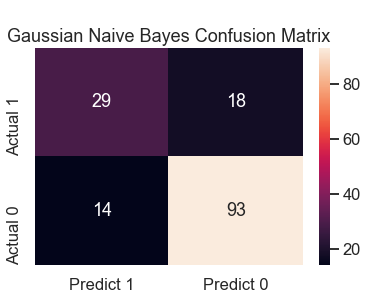

In [314]:
# Confusion matrix
cm=metrics.confusion_matrix(y_testNB, y_predNB, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
columns = [i for i in ["Predict 1","Predict 0"]])
plt.title('\nGaussian Naive Bayes Confusion Matrix')
sns.heatmap(df_cm, annot=True, fmt='g');

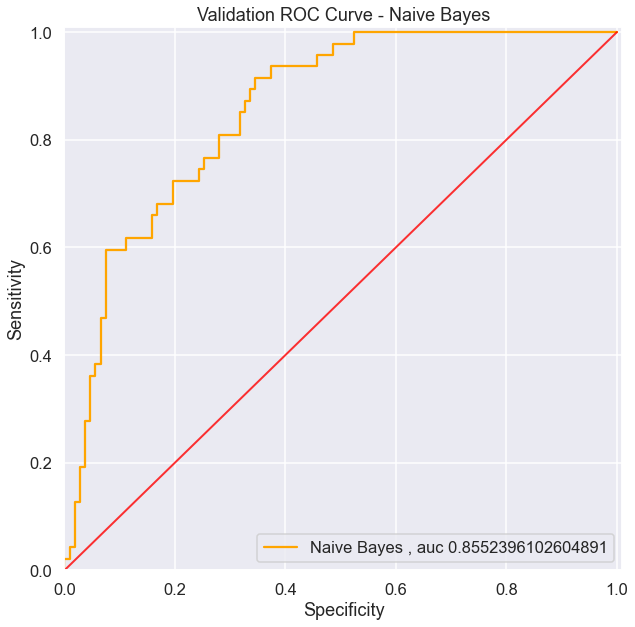

In [315]:
y_predNB_proba = NB.predict_proba(x_testNB)[::,1]
fprNB, tprNB, _ = metrics.roc_curve(y_testNB, y_predNB_proba)
aucNB =  metrics.roc_auc_score(y_testNB, y_predNB_proba)
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(fprNB, tprNB, label = "Naive Bayes , auc " + str(aucNB), color="orange")
plt.plot([0,1],[0,1],alpha=0.8,lw=2, color="red")
plt.xlim([0.00,1.01])
plt.ylim([0.00,1.01])
plt.title("Validation ROC Curve - Naive Bayes")
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")
plt.legend(loc=4)
plt.show()


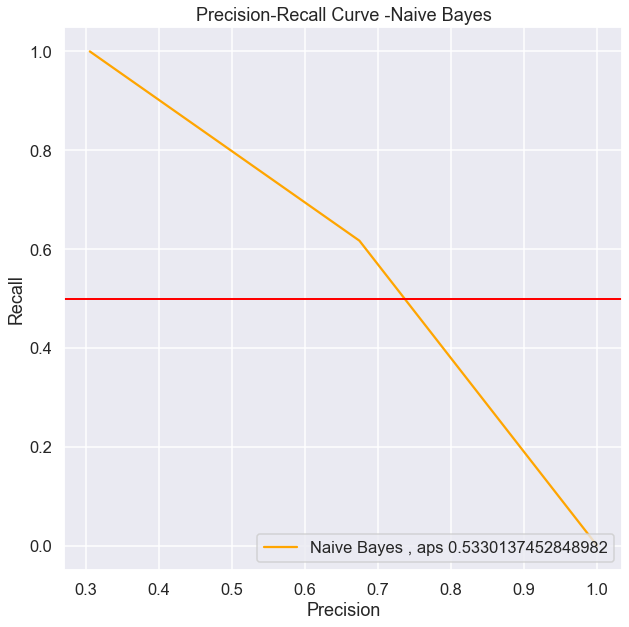

In [316]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
precisionrecallNB,recallNB,thresholdNB = precision_recall_curve(y_testNB,y_predNB)
apsNB = average_precision_score(y_testNB,y_predNB)
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(precisionrecallNB,recallNB, label = "Naive Bayes , aps " + str(apsNB), color="orange")
plt.title("Precision-Recall Curve -Naive Bayes")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc=4)
plt.axhline(y=0.5, color="red", lw=2)
plt.show()